# Control Systems : Assignment 2

# Import numpy as np

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# The external force function , can be modellled as per your requirement

In [1]:
def f1(t):
    return(1)

# PD control implemented below

In [37]:
def F(y,t):
    m = 4.333
    k = 2.551
    b =0.442
    #kd=6.314 #10.388
    #kp=-2.551 # 3.944
    kd=10.388
    kp=3.944
    pos=y[1]
    vel=y[0]
    force_limit=6 # force limit
    #feedback linearized force
    force_fb=f1(t)
    # equlibrium force around pos=0
    x_equi=0
    force_e=kp*(x_ref(t)-pos)-kd*vel
    #total force 
    force=force_e+force_fb
    #saturate force 
    if abs(force)>force_limit:
        force=force_limit*np.sign(force)
    return(np.array([force,0]))

# Reference motion of mass

In [35]:
def x_ref(t):
    w=0.02*np.pi
    F=2*np.sin(w*t)
    return F

# Solving for X''

In [6]:
def f(y,t):
    # physical constants of the system
    m = 4.333
    k = 2.551
    b =0.442
    A=np.array([[m,0],[0,1]])
    B=np.array([[b,k],[-1,0]])
    return(np.dot(inv(A),F(y,t)-np.dot(B,y)))

# Function for rk4 implementation

In [7]:
def rk4(y,t,dt):
    k1=f(y,t)
    k2=f(y*k1*0.5*dt,t+dt*0.5)
    k3=f(y*k2*0.5*dt,t+dt*0.5)
    k4=f(y+k3*dt,t+dt)
    return(dt * (k1 + 2*k2 + 2*k3 + k4) /6)

# Function to call state

In [8]:
def call_state():   
    # initializations matrices
    v_data=[]
    p_data=[]
    y=np.array([1,1])
    h=0.3  # dt used during simulation
    time=np.arange(0,1000,h)
    state=[]
    for t in time:
        y=y+rk4(y,t,h)
        state.append(y)
        v_data.append(y[0])
        p_data.append(y[1])
    return(p_data,v_data)

#  Function for Animation

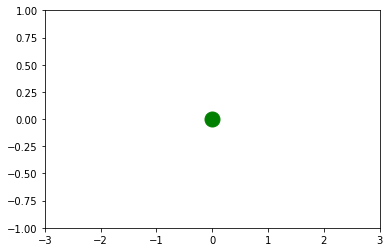

In [40]:
# initialization of plot , line and point objects
fig = plt.figure() 
ax = plt.axes(xlim=(-3, 3), ylim=(-1, 1)) 
point, = ax.plot(0, 0,marker="o",color="green",markersize=15) 
line, = ax.plot([],[],lw=2)
wall, = ax.plot([],[],lw=2)
def init():
    line.set_data([], []) 
    point.set_data([],[])
    wall.set_data([], []) 
    return point, line,wall
# update the animation with each frame
def animate(frame):
    p,v=call_state()
    point.set_data([p[frame]],[0])
    line.set_data(np.linspace(-3,p[frame],100),np.zeros(100))
    wall.set_data(-3*np.ones(100),np.linspace(-0.5,0.5,100))
    return point,line,wall

In [41]:
from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, animate,init_func=init,frames=300, interval=20, blit=False)

In [42]:
from IPython import display
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

# Simulated vs reference behaviour for reference function A sin(wt)

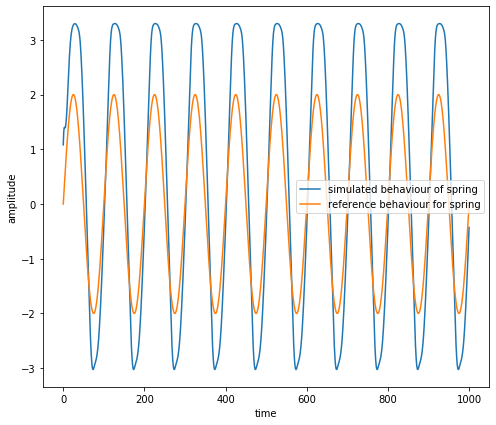

In [43]:
p,v=call_state()
x=np.arange(0,1000,0.3)
y=x_ref(x)
plt.figure(figsize=(8,7))
plt.plot(x,p,label="simulated behaviour of spring")
plt.plot(x,y,label="reference behaviour for spring")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
plt.show()

# Q 7 response

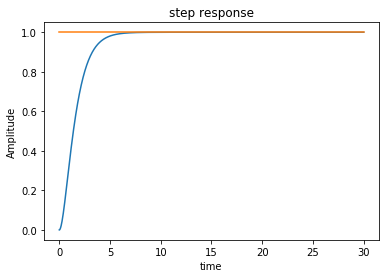

In [20]:
import matplotlib.pyplot as plt
x=np.linspace(0,30,1000)
y=1-3*np.exp(-1*x)+2*np.exp(-1.5*x)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("step response")
plt.plot(x,y)
plt.plot([0, 30.0] , [1, 1])
plt.show()

# Q 8 response

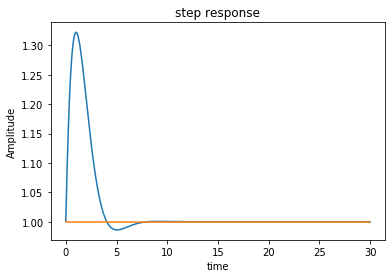

In [39]:
import matplotlib.pyplot as plt
x=np.linspace(0,30,1000)
y=1+np.exp(-1.1*x*0.707)*np.sin(1.1*x*0.707)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("step response")
plt.plot(x,y)
plt.plot([0, 30.0] , [1, 1])
plt.show()